In [124]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd  # to store tabular data
import numpy as np  # to do some math
import matplotlib.pyplot as plt  # a popular data visualization tool
import seaborn as sns  # another popular data visualization tool
%matplotlib inline  
plt.style.use('fivethirtyeight')  # a popular data visualization theme

In [125]:
pima = pd.read_csv('../data/pima.data')

In [126]:
pima.head()

6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0

In [127]:
# https://machinelearningmastery.com/handle-missing-data-python/
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']

In [128]:
pima = pd.read_csv('../data/pima.data', names=pima_column_names)

In [129]:
pima.head()

times_pregnant  plasma_glucose_concentration  diastolic_blood_pressure  \
0               6                           148                        72   
1               1                            85                        66   
2               8                           183                        64   
3               1                            89                        66   
4               0                           137                        40   

   triceps_thickness  serum_insulin   bmi  pedigree_function  age  \
0                 35              0  33.6              0.627   50   
1                 29              0  26.6              0.351   31   
2                  0              0  23.3              0.672   32   
3                 23             94  28.1              0.167   21   
4                 35            168  43.1              2.288   33   

   onset_diabetes  
0               1  
1               0  
2               1  
3               0  
4               1

In [130]:
pima.corr()['onset_diabetes'] # numerical correlation matrix
# plasma_glucose_concentration definitely seems to be an interesting feature here

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

<AxesSubplot:>

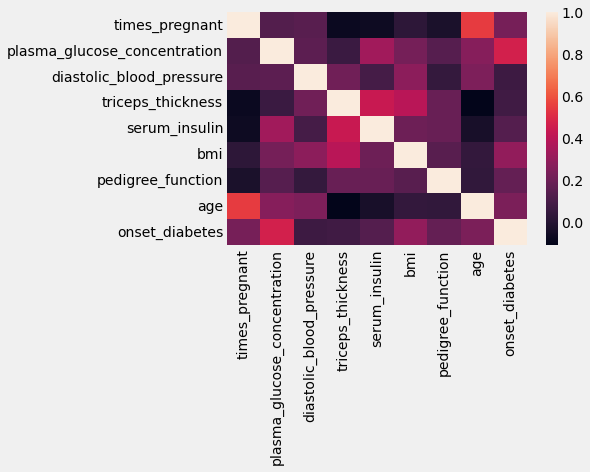

In [131]:
# look at the heatmap of the correlation matrix of our dataset
sns.heatmap(pima.corr())

In [132]:
pima.shape

(768, 9)

In [133]:
pima.isnull().sum()  
# oh good, we have no missing values, let's do some more EDA

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [134]:
pima['onset_diabetes'].value_counts()

0    500
1    268
Name: onset_diabetes, dtype: int64

In [135]:
pima['onset_diabetes'].value_counts(normalize=True) 
# get null accuracy, 65% did not develop diabetes

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [136]:
pima.describe()  # get some basic descriptive statistics

times_pregnant  plasma_glucose_concentration  diastolic_blood_pressure  \
count      768.000000                    768.000000                768.000000   
mean         3.845052                    120.894531                 69.105469   
std          3.369578                     31.972618                 19.355807   
min          0.000000                      0.000000                  0.000000   
25%          1.000000                     99.000000                 62.000000   
50%          3.000000                    117.000000                 72.000000   
75%          6.000000                    140.250000                 80.000000   
max         17.000000                    199.000000                122.000000   

       triceps_thickness  serum_insulin         bmi  pedigree_function  \
count         768.000000     768.000000  768.000000         768.000000   
mean           20.536458      79.799479   31.992578           0.471876   
std            15.952218     115.244002    7.884160           0.331329   
min             0.000000       0.000000    0.000000           0.078000   
25%             0.000000       0.000000   27.300000           0.243750   
50%            23.000000      30.500000   32.000000           0.372500   
75%            32.000000     127.250000   36.600000           0.626250   
max            99.000000     846.000000   67.100000           2.420000   

              age  onset_diabetes  
count  768.000000      768.000000  
mean    33.240885        0.348958  
std     11.760232        0.476951  
min     21.000000        0.000000  
25%     24.000000        0.000000  
50%     29.000000        0.000000  
75%     41.000000        1.000000  
max     81.000000        1.000000

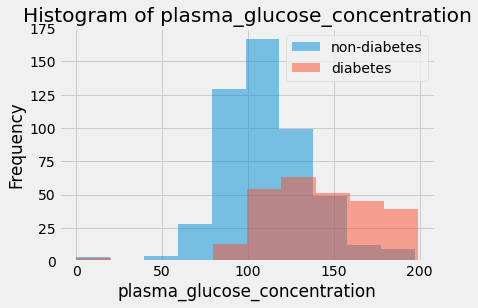

In [137]:
# get a histogram of the plasma_glucose_concentration column for
# both classes

col = 'plasma_glucose_concentration'
plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

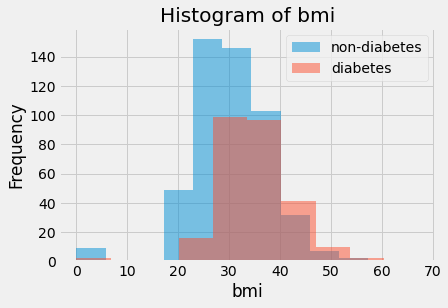

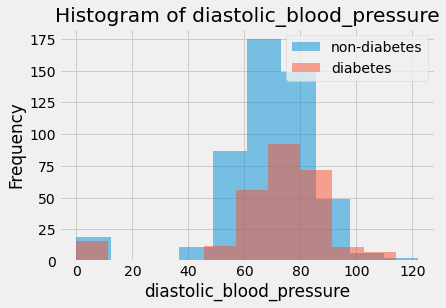

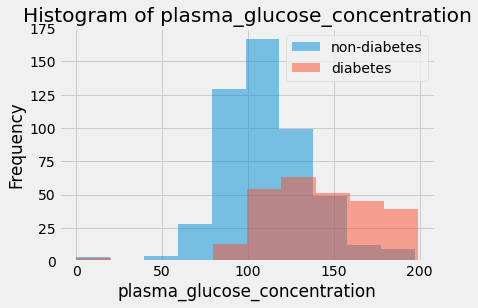

In [138]:
for col in ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']:
    plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

In [139]:
# woah woah, notice that the min value of bmi is 0. That is physically impossible. 
# Perhaps 0 has been encoded as a missing value instead of None

In [140]:
# We see that a 0 appears as a min for 
# times_pregnant
# plasma_glucose_concentration
# diastolic_blood_pressure
# triceps_thickness
# serum_insulin
# bmi
# onset_diabetes

In [141]:
# because 0 is a class for onset_diabetes and 0 is a viable number for times_pregnant, we may conclude that 0
# is encoding missing values for 

# plasma_glucose_concentration
# diastolic_blood_pressure
# triceps_thickness
# serum_insulin
# bmi

In [142]:
# Let's replace the 0's in these columns with None so our fillna, and dropna functions may work properly
pima['serum_insulin'].isnull().sum()

0

In [143]:
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x:x if x != 0 else None)
# manually replace all 0's with a None value

In [144]:
pima['serum_insulin'].isnull().sum()

374

In [145]:
# A little faster now for all columns

for col in ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']:
    pima[col].replace([0], [None], inplace=True)

In [146]:
pima.isnull().sum()  # this makes more sense now!

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [147]:
pima.head()

times_pregnant plasma_glucose_concentration diastolic_blood_pressure  \
0               6                          148                       72   
1               1                           85                       66   
2               8                          183                       64   
3               1                           89                       66   
4               0                          137                       40   

  triceps_thickness  serum_insulin   bmi  pedigree_function  age  \
0                35            NaN  33.6              0.627   50   
1                29            NaN  26.6              0.351   31   
2              None            NaN  23.3              0.672   32   
3                23           94.0  28.1              0.167   21   
4                35          168.0  43.1              2.288   33   

   onset_diabetes  
0               1  
1               0  
2               1  
3               0  
4               1

In [148]:
pima.describe()  # doesn't include columns with missing values..

times_pregnant  serum_insulin  pedigree_function         age  \
count      768.000000     394.000000         768.000000  768.000000   
mean         3.845052     155.548223           0.471876   33.240885   
std          3.369578     118.775855           0.331329   11.760232   
min          0.000000      14.000000           0.078000   21.000000   
25%          1.000000      76.250000           0.243750   24.000000   
50%          3.000000     125.000000           0.372500   29.000000   
75%          6.000000     190.000000           0.626250   41.000000   
max         17.000000     846.000000           2.420000   81.000000   

       onset_diabetes  
count      768.000000  
mean         0.348958  
std          0.476951  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
max          1.000000

In [149]:
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.6867627785059, 30.53564107280403)

In [150]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [151]:
empty_plasma_index = pima[pima['plasma_glucose_concentration'].isnull()].index
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, dtype: object

In [152]:
pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(), inplace=True)
# fill the column's missing values with the mean of the rest of the column

In [153]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [154]:
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [155]:
# from sklearn.preprocessing import Imputer  ### 已經deprecated
from sklearn.impute import SimpleImputer
# http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [156]:
imputer = SimpleImputer(strategy='mean')

In [157]:
pima_imputed = imputer.fit_transform(pima)

In [158]:
type(pima_imputed)  # comes out as an array

numpy.ndarray

In [159]:
pima_imputed

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [160]:
pima_column_names

['times_pregnant',
 'plasma_glucose_concentration',
 'diastolic_blood_pressure',
 'triceps_thickness',
 'serum_insulin',
 'bmi',
 'pedigree_function',
 'age',
 'onset_diabetes']

In [161]:
pima_imputed = pd.DataFrame(pima_imputed, columns=pima_column_names)
pima_imputed

times_pregnant  plasma_glucose_concentration  diastolic_blood_pressure  \
0               6.0                         148.0                      72.0   
1               1.0                          85.0                      66.0   
2               8.0                         183.0                      64.0   
3               1.0                          89.0                      66.0   
4               0.0                         137.0                      40.0   
..              ...                           ...                       ...   
763            10.0                         101.0                      76.0   
764             2.0                         122.0                      70.0   
765             5.0                         121.0                      72.0   
766             1.0                         126.0                      60.0   
767             1.0                          93.0                      70.0   

     triceps_thickness  serum_insulin   bmi  pedigree_function   age  \
0             35.00000     155.548223  33.6              0.627  50.0   
1             29.00000     155.548223  26.6              0.351  31.0   
2             29.15342     155.548223  23.3              0.672  32.0   
3             23.00000      94.000000  28.1              0.167  21.0   
4             35.00000     168.000000  43.1              2.288  33.0   
..                 ...            ...   ...                ...   ...   
763           48.00000     180.000000  32.9              0.171  63.0   
764           27.00000     155.548223  36.8              0.340  27.0   
765           23.00000     112.000000  26.2              0.245  30.0   
766           29.15342     155.548223  30.1              0.349  47.0   
767           31.00000     155.548223  30.4              0.315  23.0   

     onset_diabetes  
0               1.0  
1               0.0  
2               1.0  
3               0.0  
4               1.0  
..              ...  
763             0.0  
764             0.0  
765             0.0  
766             1.0  
767             0.0  

[768 rows x 9 columns]

In [162]:
pima_imputed.head()  # notice for example the triceps_thickness missing values were replaced with 29.15342

times_pregnant  plasma_glucose_concentration  diastolic_blood_pressure  \
0             6.0                         148.0                      72.0   
1             1.0                          85.0                      66.0   
2             8.0                         183.0                      64.0   
3             1.0                          89.0                      66.0   
4             0.0                         137.0                      40.0   

   triceps_thickness  serum_insulin   bmi  pedigree_function   age  \
0           35.00000     155.548223  33.6              0.627  50.0   
1           29.00000     155.548223  26.6              0.351  31.0   
2           29.15342     155.548223  23.3              0.672  32.0   
3           23.00000      94.000000  28.1              0.167  21.0   
4           35.00000     168.000000  43.1              2.288  33.0   

   onset_diabetes  
0             1.0  
1             0.0  
2             1.0  
3             0.0  
4             1.0

In [163]:
pima_imputed.loc[empty_plasma_index]['plasma_glucose_concentration']  
# same values as we obtained with fillna

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, dtype: float64

In [164]:
pima_imputed.isnull().sum()  # no missing values

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [165]:
# drop the rows with missing values
pima_dropped = pima.dropna()

In [166]:
print("retained {}% of rows".format(round(100*(pima.shape[0] - pima_dropped.shape[0])/float(pima.shape[0]))))
# lost over half of the rows!

retained 49% of rows


In [167]:
# some EDA of the dataset before it was dropped and after

In [168]:
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [169]:
pima_dropped['onset_diabetes'].value_counts(normalize=True)  # the split of trues and falses stay relatively the same

0    0.669211
1    0.330789
Name: onset_diabetes, dtype: float64

In [170]:
# the mean values of each column (excluding missing values)
pima.mean()

times_pregnant                    3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

In [171]:
# the mean values of each column (with missing values rows dropped)
pima_dropped.mean()

times_pregnant                    3.295165
plasma_glucose_concentration    122.625157
diastolic_blood_pressure         70.671756
triceps_thickness                29.122137
serum_insulin                   155.717557
bmi                              33.072519
pedigree_function                 0.522476
age                              30.839695
onset_diabetes                    0.330789
dtype: float64

In [172]:
# % change in means
(pima_dropped.mean() - pima.mean()) / pima.mean()

times_pregnant                 -0.143012
plasma_glucose_concentration    0.007712
diastolic_blood_pressure       -0.023941
triceps_thickness              -0.001073
serum_insulin                   0.001089
bmi                             0.018950
pedigree_function               0.107230
age                            -0.072236
onset_diabetes                 -0.052068
dtype: float64

Text(0, 0.5, '% change')

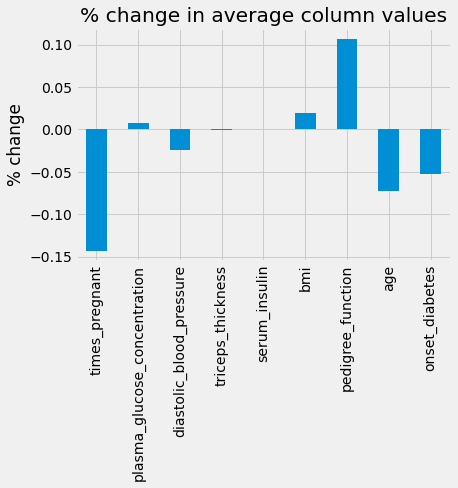

In [173]:
# % change in means as a bar chart
ax = ((pima_dropped.mean() - pima.mean()) / pima.mean()).plot(kind='bar', title='% change in average column values')
ax.set_ylabel('% change')

In [174]:
# the pedigree_fucntion average rose 11% after dropping missing values, which is a big increase!
# while the number of times pregnant dropped 14%

# we can see how dropping values severely affects the shape of the data and we should try to retain as much as possible

In [175]:
pima.shape

(768, 9)

In [176]:
# now lets do some machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [177]:
# note we are using the dataset with the dropped rows
X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
# create our feature matrix by removing the response variable
print("learning from {} rows".format(X_dropped.shape[0]))
y_dropped = pima_dropped['onset_diabetes']


# our grid search variables and instances

# KNN parameters to try
knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}

knn = KNeighborsClassifier()

print(knn, knn_params)
grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

print(grid)
print(grid.best_score_, grid.best_params_)
# but we are learning from way fewer rows..

learning from 393 rows
KNeighborsClassifier() {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13]})
0.7559234014930217 {'n_neighbors': 8}


In [178]:
# impute values with 0
pima_zero = pima.fillna(0)

X_zero = pima_zero.drop('onset_diabetes', axis=1)
print("learning from {} rows".format(X_zero.shape[0]))
y_zero = pima_zero['onset_diabetes']

knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)

print(grid.best_score_, grid.best_params_)  
# if the values stayed at 0, our accuracy goes down

learning from 768 rows
0.7565656565656566 {'n_neighbors': 13}


In [179]:
(170-105)*0.618/3.14

12.792993630573248

In [180]:
from sklearn.model_selection import train_test_split

X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X.isnull().sum()

serum_insulin    374
dtype: int64

In [181]:
# the improper way.. imputing values BEFORE splitting
entire_data_set_mean = X.mean()
X = X.fillna(entire_data_set_mean)
print(entire_data_set_mean)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

serum_insulin    155.548223
dtype: float64


In [182]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.6666666666666666

In [183]:
# the proper way.. imputing values AFTER splitting
from sklearn.model_selection import train_test_split

X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

X.isnull().sum()

serum_insulin    374
dtype: int64

In [184]:
training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)

print(training_mean)  
# not the entire dataset's mean, it's much higher!!

serum_insulin    158.546053
dtype: float64


In [185]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

knn.score(X_test, y_test)
# lower accuracy, but much more honest in the mode's ability to generalize a pattern to outside data

0.6822916666666666

In [186]:
# TODO talk about how it is improper mathematically to impute the entire dataset and then go into machine learning
# it is better to set up a sklearn pipeline to do your steps

In [187]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer as Imputer
knn

KNeighborsClassifier()

In [188]:
knn_params = {'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14]}
# must redefine params to fit the pipeline

mean_impute = Pipeline([('imputer', Imputer(strategy='mean')), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7487734487734488 {'classify__n_neighbors': 8}


In [189]:
knn_params = {'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

median_impute = Pipeline([('imputer', Imputer(strategy='median')), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(median_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7292589763177999 {'classify__n_neighbors': 7}


In [190]:
# our accuracies may be lower, but they were made on more than twice the size of the dataset with missing values!
# they were still better than leaving them all at 0

In [191]:
impute = Imputer(strategy='mean')
# we will want to fill in missing values to see all 9 columns

pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima), columns=pima_column_names)

array([[<AxesSubplot:title={'center':'times_pregnant'}>,
        <AxesSubplot:title={'center':'plasma_glucose_concentration'}>,
        <AxesSubplot:title={'center':'diastolic_blood_pressure'}>],
       [<AxesSubplot:title={'center':'triceps_thickness'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'onset_diabetes'}>]], dtype=object)

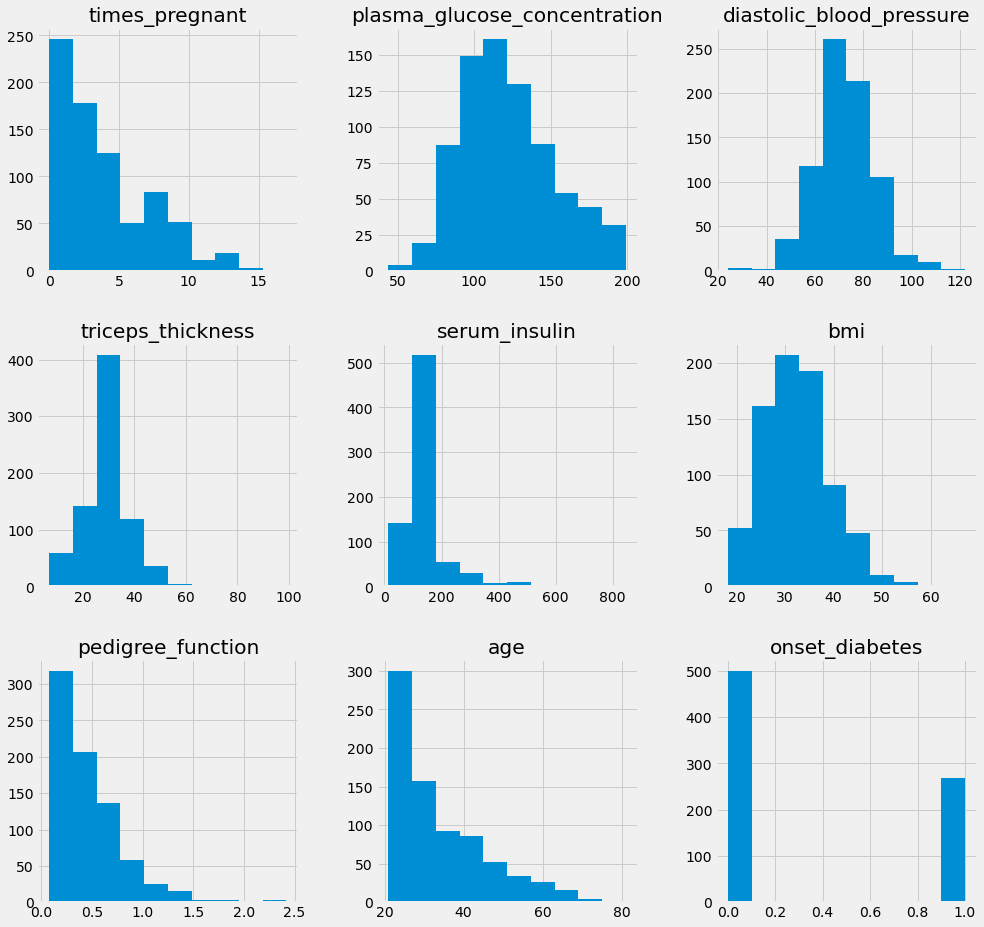

In [192]:
pima_imputed_mean.hist(figsize=(15, 15))

In [193]:
pima_imputed_mean.describe()

times_pregnant  plasma_glucose_concentration  diastolic_blood_pressure  \
count      768.000000                    768.000000                768.000000   
mean         3.845052                    121.686763                 72.405184   
std          3.369578                     30.435949                 12.096346   
min          0.000000                     44.000000                 24.000000   
25%          1.000000                     99.750000                 64.000000   
50%          3.000000                    117.000000                 72.202592   
75%          6.000000                    140.250000                 80.000000   
max         17.000000                    199.000000                122.000000   

       triceps_thickness  serum_insulin         bmi  pedigree_function  \
count         768.000000     768.000000  768.000000         768.000000   
mean           29.153420     155.548223   32.457464           0.471876   
std             8.790942      85.021108    6.875151           0.331329   
min             7.000000      14.000000   18.200000           0.078000   
25%            25.000000     121.500000   27.500000           0.243750   
50%            29.153420     155.548223   32.400000           0.372500   
75%            32.000000     155.548223   36.600000           0.626250   
max            99.000000     846.000000   67.100000           2.420000   

              age  onset_diabetes  
count  768.000000      768.000000  
mean    33.240885        0.348958  
std     11.760232        0.476951  
min     21.000000        0.000000  
25%     24.000000        0.000000  
50%     29.000000        0.000000  
75%     41.000000        1.000000  
max     81.000000        1.000000

array([[<AxesSubplot:title={'center':'times_pregnant'}>,
        <AxesSubplot:title={'center':'plasma_glucose_concentration'}>,
        <AxesSubplot:title={'center':'diastolic_blood_pressure'}>],
       [<AxesSubplot:title={'center':'triceps_thickness'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'onset_diabetes'}>]], dtype=object)

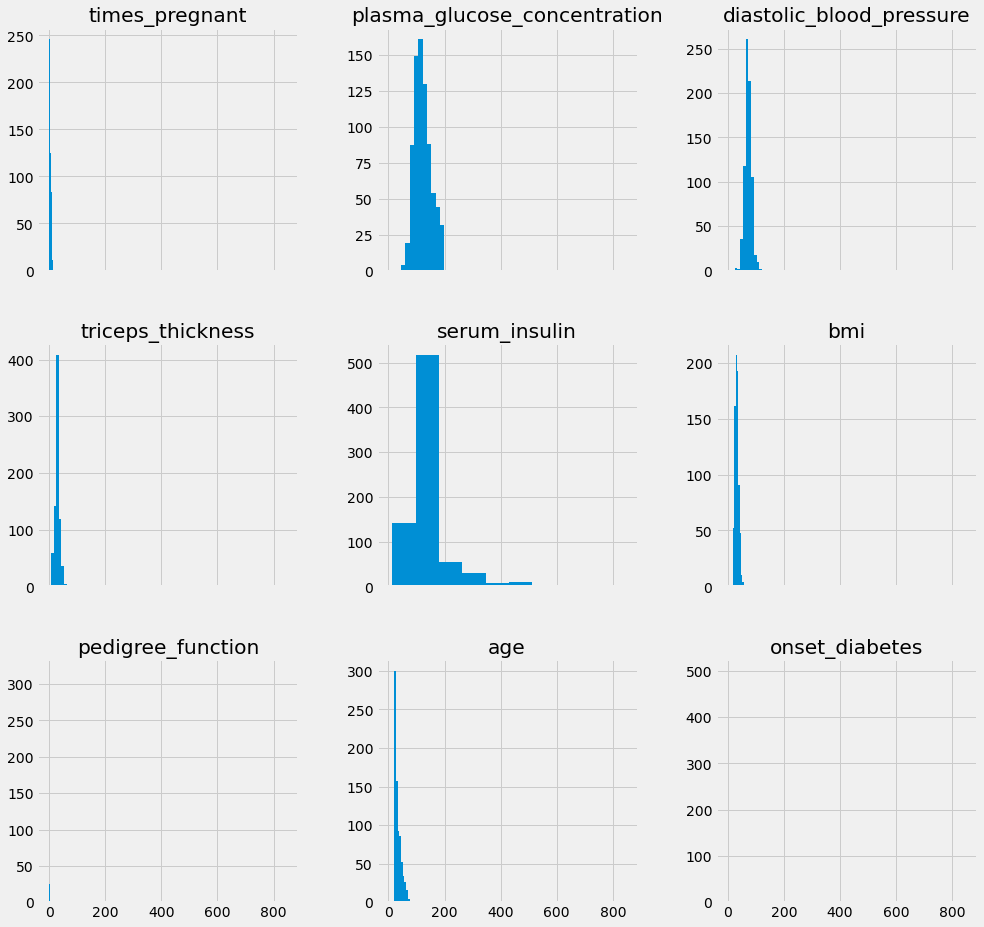

In [194]:
pima_imputed_mean.hist(figsize=(15, 15), sharex=True)
# with the same x axis (the y axis is not as important here)

In [195]:
# TODO talk about standardization (column-based z-score normalization) vs normalization (row-based norm scaling)

# https://stackoverflow.com/questions/39120942/difference-between-standardscaler-and-normalizer-in-sklearn-preprocessing

# talk about how some models are affected by standardization

In [196]:
print(pima['plasma_glucose_concentration'].head())

# get the mean of the column
mu = pima['plasma_glucose_concentration'].mean()

# get the standard deviation of the column
sigma = pima['plasma_glucose_concentration'].std()

# calculate z scores for every value in the column.
print(((pima['plasma_glucose_concentration'] - mu) / sigma).head())

0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: plasma_glucose_concentration, dtype: float64
0    0.864545
1   -1.205376
2    2.014501
3   -1.073952
4    0.503130
Name: plasma_glucose_concentration, dtype: float64


In [197]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

In [198]:
# mean and std before z score standardizing
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.68676277850587, 30.43594886720766)

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration')

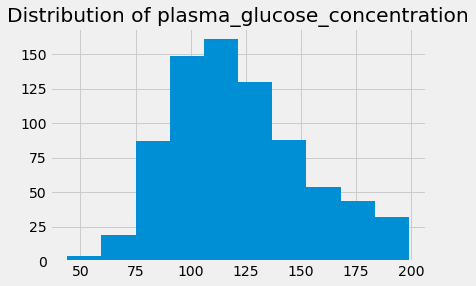

In [199]:
ax = pima['plasma_glucose_concentration'].hist()
ax.set_title('Distribution of plasma_glucose_concentration')

In [200]:
glucose_z_score_standardized = StandardScaler().fit_transform(pima[['plasma_glucose_concentration']])
# note we use the double bracket notation [[ ]] because the transformer requires a dataframe

# mean of 0 (floating point error) and standard deviation of 1
glucose_z_score_standardized.mean(), glucose_z_score_standardized.std()

(-3.561965537339044e-16, 1.0)

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration after Z Score Scaling')

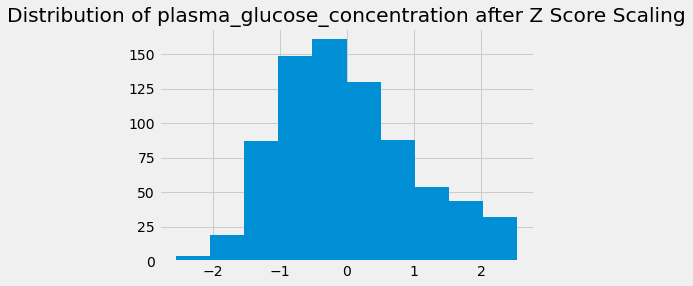

In [201]:
ax = pd.Series(glucose_z_score_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Z Score Scaling')

In [202]:
glucose_min_max_standardized = MinMaxScaler().fit_transform(pima[['plasma_glucose_concentration']])

# doesn't guarantee a mean or standard deviation
glucose_min_max_standardized.mean(), glucose_min_max_standardized.std()

(0.5012049211516509, 0.19623307962522193)

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration after Min Max Scaling')

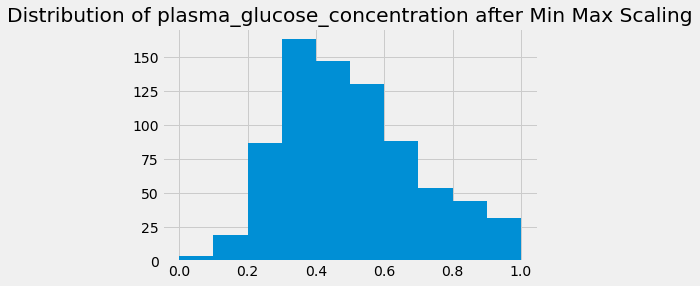

In [203]:
ax = pd.Series(glucose_min_max_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Min Max Scaling')

In [204]:
# notice the shape never changes, but the values do

array([[<AxesSubplot:title={'center':'times_pregnant'}>,
        <AxesSubplot:title={'center':'plasma_glucose_concentration'}>,
        <AxesSubplot:title={'center':'diastolic_blood_pressure'}>],
       [<AxesSubplot:title={'center':'triceps_thickness'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'pedigree_function'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'onset_diabetes'}>]], dtype=object)

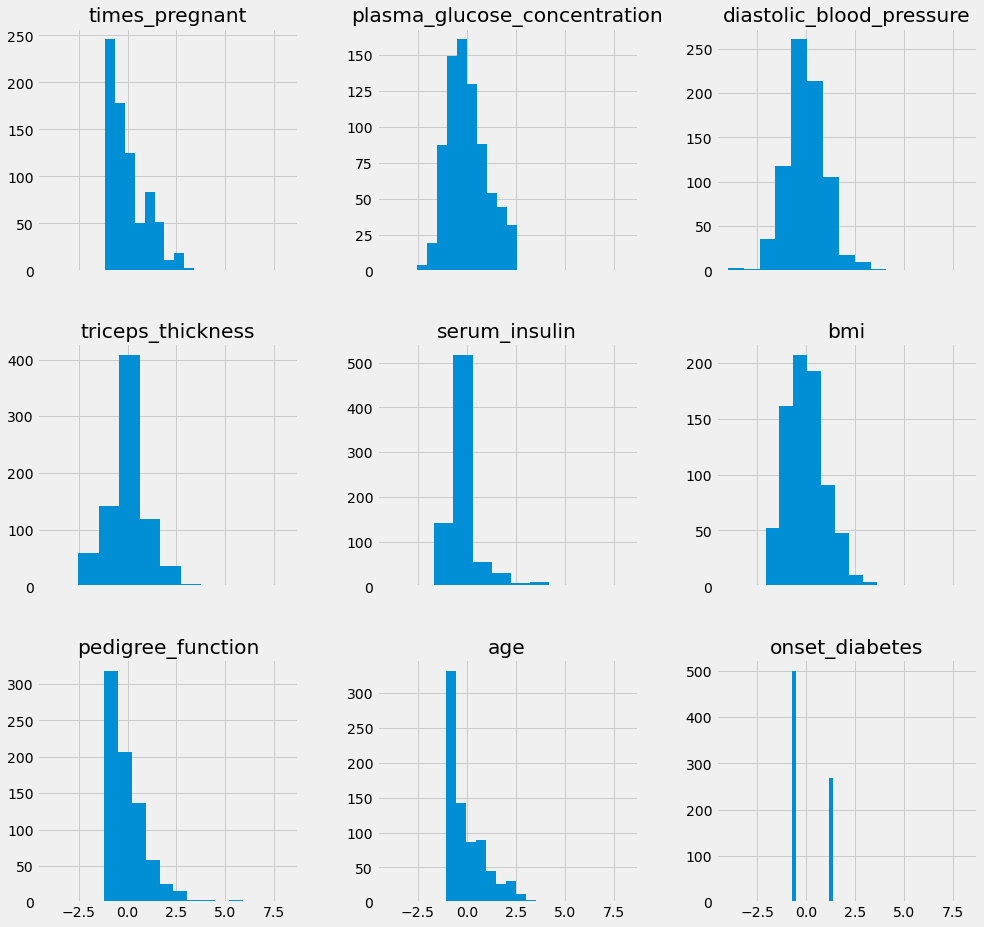

In [209]:
scale = StandardScaler()  # instantiate a z-scaler object

pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean), columns=pima_column_names)

pima_imputed_mean_scaled.hist(figsize=(15, 15), sharex=True)
# now all share the same "space"

In [206]:
# like with the imputer, we must use pipelines to ensure that we aren't cheating and standardizing training data
# using knowledge from the testing data

In [214]:
knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

# mean_impute_standardize = Pipeline([('imputer', Imputer()), ('standardize', StandardScaler()), ('classify', knn)])
mean_impute_standardize = Pipeline([('imputer', Imputer()), 
                                    ('standardize', StandardScaler()), 
                                    ('classify', KNeighborsClassifier())])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7539173245055598 {'classify__n_neighbors': 7, 'imputer__strategy': 'mean'}


In [215]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed), columns=pima_column_names)


In [216]:
pima_min_maxed.describe()

times_pregnant  plasma_glucose_concentration  diastolic_blood_pressure  \
count      768.000000                    768.000000                768.000000   
mean         0.226180                      0.501205                  0.493930   
std          0.198210                      0.196361                  0.123432   
min          0.000000                      0.000000                  0.000000   
25%          0.058824                      0.359677                  0.408163   
50%          0.176471                      0.470968                  0.491863   
75%          0.352941                      0.620968                  0.571429   
max          1.000000                      1.000000                  1.000000   

       triceps_thickness  serum_insulin         bmi  pedigree_function  \
count         768.000000     768.000000  768.000000         768.000000   
mean            0.240798       0.170130    0.291564           0.168179   
std             0.095554       0.102189    0.140596           0.141473   
min             0.000000       0.000000    0.000000           0.000000   
25%             0.195652       0.129207    0.190184           0.070773   
50%             0.240798       0.170130    0.290389           0.125747   
75%             0.271739       0.170130    0.376278           0.234095   
max             1.000000       1.000000    1.000000           1.000000   

              age  onset_diabetes  
count  768.000000      768.000000  
mean     0.204015        0.348958  
std      0.196004        0.476951  
min      0.000000        0.000000  
25%      0.050000        0.000000  
50%      0.133333        0.000000  
75%      0.333333        1.000000  
max      1.000000        1.000000

In [218]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', Imputer()), 
                                    ('standardize', MinMaxScaler()), 
                                    ('classify', KNeighborsClassifier())])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)
# woah woah woah, this is the best accuracy we've gotten so far working with missing data

0.7630336983278159 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


In [219]:
np.sqrt((pima_imputed**2).sum(axis=1)).mean()  
# average vector length of imputed matrix

223.3622202582376

In [221]:
from sklearn.preprocessing import Normalizer # our row normalizer

In [222]:
normalize = Normalizer()

pima_normalized = pd.DataFrame(normalize.fit_transform(pima_imputed), columns=pima_column_names)

In [226]:
pima_imputed

times_pregnant  plasma_glucose_concentration  diastolic_blood_pressure  \
0               6.0                         148.0                      72.0   
1               1.0                          85.0                      66.0   
2               8.0                         183.0                      64.0   
3               1.0                          89.0                      66.0   
4               0.0                         137.0                      40.0   
..              ...                           ...                       ...   
763            10.0                         101.0                      76.0   
764             2.0                         122.0                      70.0   
765             5.0                         121.0                      72.0   
766             1.0                         126.0                      60.0   
767             1.0                          93.0                      70.0   

     triceps_thickness  serum_insulin   bmi  pedigree_function   age  \
0             35.00000     155.548223  33.6              0.627  50.0   
1             29.00000     155.548223  26.6              0.351  31.0   
2             29.15342     155.548223  23.3              0.672  32.0   
3             23.00000      94.000000  28.1              0.167  21.0   
4             35.00000     168.000000  43.1              2.288  33.0   
..                 ...            ...   ...                ...   ...   
763           48.00000     180.000000  32.9              0.171  63.0   
764           27.00000     155.548223  36.8              0.340  27.0   
765           23.00000     112.000000  26.2              0.245  30.0   
766           29.15342     155.548223  30.1              0.349  47.0   
767           31.00000     155.548223  30.4              0.315  23.0   

     onset_diabetes  
0               1.0  
1               0.0  
2               1.0  
3               0.0  
4               1.0  
..              ...  
763             0.0  
764             0.0  
765             0.0  
766             1.0  
767             0.0  

[768 rows x 9 columns]

In [227]:
pima_normalized

times_pregnant  plasma_glucose_concentration  diastolic_blood_pressure  \
0          0.025315                      0.624441                  0.303782   
1          0.005111                      0.434404                  0.337302   
2          0.031558                      0.721892                  0.252465   
3          0.006612                      0.588467                  0.436392   
4          0.000000                      0.596381                  0.174126   
..              ...                           ...                       ...   
763        0.042321                      0.427443                  0.321640   
764        0.009245                      0.563972                  0.323590   
765        0.026915                      0.651352                  0.387582   
766        0.004582                      0.577288                  0.274899   
767        0.004990                      0.464076                  0.349304   

     triceps_thickness  serum_insulin       bmi  pedigree_function       age  \
0             0.147672       0.656289  0.141765           0.002645  0.210960   
1             0.148208       0.794950  0.135943           0.001794  0.158430   
2             0.115003       0.613601  0.091913           0.002651  0.126232   
3             0.152076       0.621527  0.185797           0.001104  0.138852   
4             0.152360       0.731328  0.187620           0.009960  0.143654   
..                 ...            ...       ...                ...       ...   
763           0.203141       0.761779  0.139236           0.000724  0.266623   
764           0.124813       0.719056  0.170116           0.001572  0.124813   
765           0.123811       0.602905  0.141037           0.001319  0.161492   
766           0.133571       0.712667  0.137908           0.001599  0.215338   
767           0.154692       0.776195  0.151698           0.001572  0.114771   

     onset_diabetes  
0          0.004219  
1          0.000000  
2          0.003945  
3          0.000000  
4          0.004353  
..              ...  
763        0.000000  
764        0.000000  
765        0.000000  
766        0.004582  
767        0.000000  

[768 rows x 9 columns]

In [228]:
pima_normalized**2

times_pregnant  plasma_glucose_concentration  diastolic_blood_pressure  \
0          0.000641                      0.389927                  0.092284   
1          0.000026                      0.188707                  0.113772   
2          0.000996                      0.521128                  0.063739   
3          0.000044                      0.346294                  0.190438   
4          0.000000                      0.355670                  0.030320   
..              ...                           ...                       ...   
763        0.001791                      0.182707                  0.103452   
764        0.000085                      0.318064                  0.104711   
765        0.000724                      0.424260                  0.150220   
766        0.000021                      0.333261                  0.075569   
767        0.000025                      0.215366                  0.122013   

     triceps_thickness  serum_insulin       bmi  pedigree_function       age  \
0             0.021807       0.430715  0.020097       6.998341e-06  0.044504   
1             0.021966       0.631945  0.018480       3.217834e-06  0.025100   
2             0.013226       0.376506  0.008448       7.027176e-06  0.015935   
3             0.023127       0.386296  0.034521       1.219264e-06  0.019280   
4             0.023214       0.534841  0.035201       9.920144e-05  0.020636   
..                 ...            ...       ...                ...       ...   
763           0.041266       0.580308  0.019387       5.237278e-07  0.071088   
764           0.015578       0.517041  0.028939       2.470317e-06  0.015578   
765           0.015329       0.363494  0.019891       1.739376e-06  0.026080   
766           0.017841       0.507895  0.019019       2.556787e-06  0.046370   
767           0.023930       0.602479  0.023012       2.470772e-06  0.013172   

     onset_diabetes  
0          0.000018  
1          0.000000  
2          0.000016  
3          0.000000  
4          0.000019  
..              ...  
763        0.000000  
764        0.000000  
765        0.000000  
766        0.000021  
767        0.000000  

[768 rows x 9 columns]

In [230]:
(pima_normalized**2).sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
763    1.0
764    1.0
765    1.0
766    1.0
767    1.0
Length: 768, dtype: float64

In [223]:
np.sqrt((pima_normalized**2).sum(axis=1)).mean()
# average vector length of row normalized imputed matrix

1.0

In [225]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_normalize = Pipeline([('imputer', Imputer()), 
                                  ('normalize', Normalizer()), 
                                  ('classify', KNeighborsClassifier())])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_normalize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7006111535523301 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}
